## Notes

* Try making a target column based on daily changes of the ICO composite index. Use a threshold (e.g., changes greater than ±10%); base this threshold on volatility or standard deviation.
* For all factors, provide a country weight based on previous production output.

In [1]:
import pandas as pd
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing ICO composite index prices

In [2]:
raw_ICO_index_data = pd.read_csv("../datasets/capstone/us_monthlycommoditypriceaverages_03927558512071.csv", encoding = "ISO-8859-1", header = 1)

In [3]:
ICO_index_data = raw_ICO_index_data.copy()
ICO_index_data = ICO_index_data.drop(labels = 0).T
ICO_index_data.rename(columns = ICO_index_data.loc["PERIOD", :], inplace = True)
ICO_index_data = ICO_index_data.drop(labels = ["PERIOD"])
ICO_index_data = ICO_index_data.apply(pd.to_numeric, errors = 'coerce')
ICO_index_data["time"] = pd.to_datetime(ICO_index_data.index.values, format = "%b%Y")

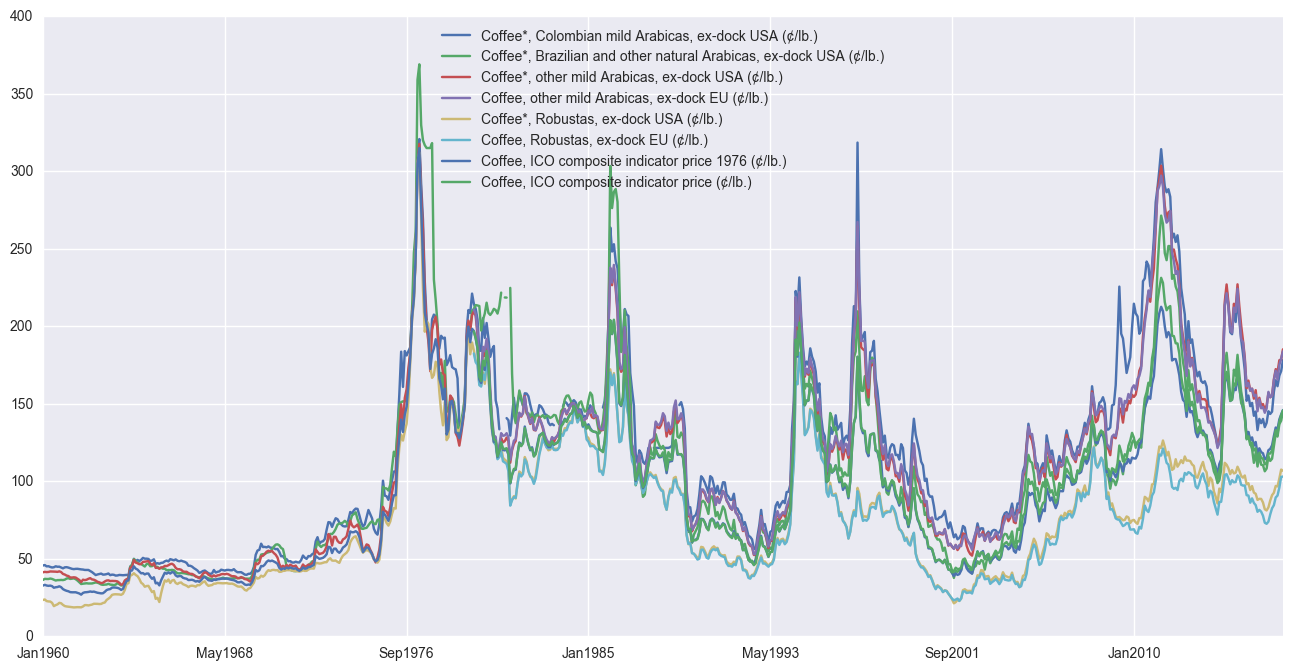

In [4]:
ICO_index_data.plot(figsize=(16,8))
sns.plt.show()

In [5]:
ICO_index_since_1989_data = ICO_index_data[ICO_index_data["time"] > datetime.date(1988,12,31)]
ICO_index_since_1989_data.index = ICO_index_since_1989_data["time"].values
ICO_index_since_1989_data = ICO_index_since_1989_data.drop("time", axis = 1)

In [6]:
### Define target column

In [12]:
# ICO_index_since_1989_data["Coffee*, Brazilian and other natural Arabicas, ex-dock USA (¢/lb.)"]

### Import weather data CSV created in module

In [13]:
temperature_data = pd.read_csv("../datasets/capstone/temperature-in-coffee-growing-regions-since-1990--from-berkeley-earth.csv")
temperature_data["Unnamed: 0"] = pd.to_datetime(temperature_data["Unnamed: 0"].values)
temperature_data.index = temperature_data["Unnamed: 0"].values

In [14]:
minimum_temperatures_by_country = temperature_data.pivot_table(values = "Temperature (C)", index = temperature_data.index, columns = "Country", aggfunc='min')


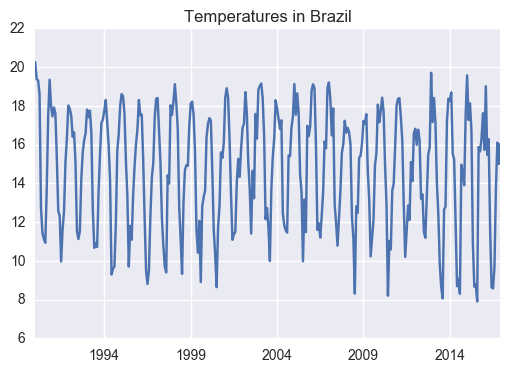

In [15]:
minimum_temperatures_by_country["Brazil"].plot()
plt.title("Temperatures in Brazil")
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


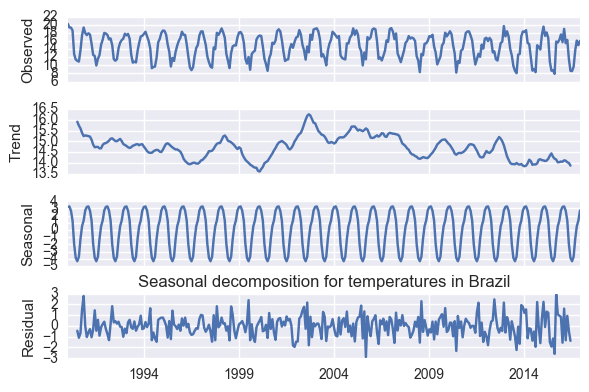

In [25]:
brazil_temperature_seasonal_decomp = seasonal_decompose(minimum_temperatures_by_country["Brazil"], freq = 12)

brazil_temperature_seasonal_decomp.plot()
plt.title("Seasonal decomposition for temperatures in Brazil")
plt.show()

//anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


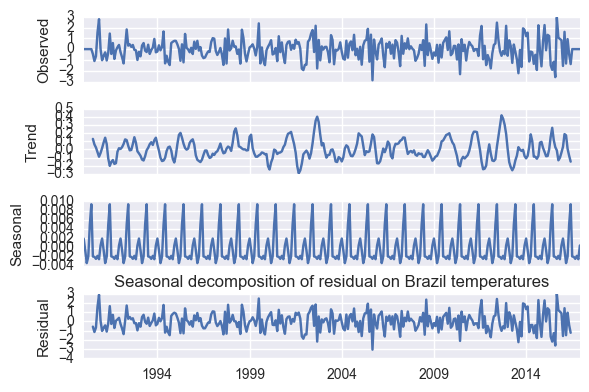

In [34]:
seasonal_decompose(brazil_temperature_seasonal_decomp.resid.fillna(0), freq = 12).plot()
plt.title("Seasonal decomposition of residual on Brazil temperatures")
plt.show()

NameError: name 'pd' is not defined